# GKP Test

The purpose of this notebook is to determine how best to sweep GKP code parameters so that it can be accurately compared with binomial codes and random codes. Mainly, there is a need to establish a relationship between the energy constraint, the boson number cutoff, and the average boson number. TODO

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import multiprocess
import qutip as qt
from src import code_simulator, code, noise

### Parameters

In [2]:
energy_constraint = 0.001
truth_physical_dimension = 150
lower_bound_physical_dimension = 2

### Compare Physical Dimension Cutoffs for Fixed Energy Constraint

TODO: do the below but also vary the energy constraint parameter to see how the photon number cutoff is affected

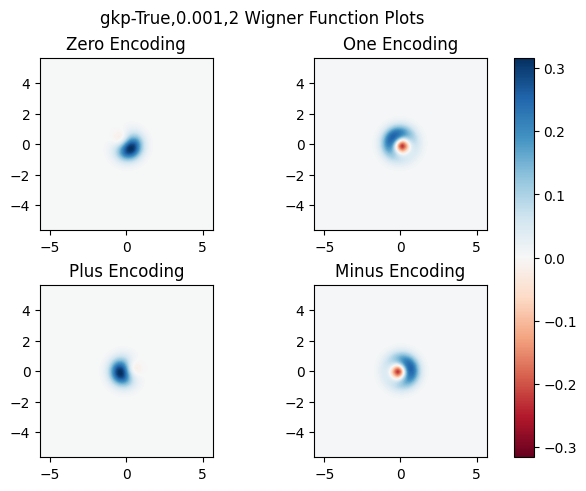

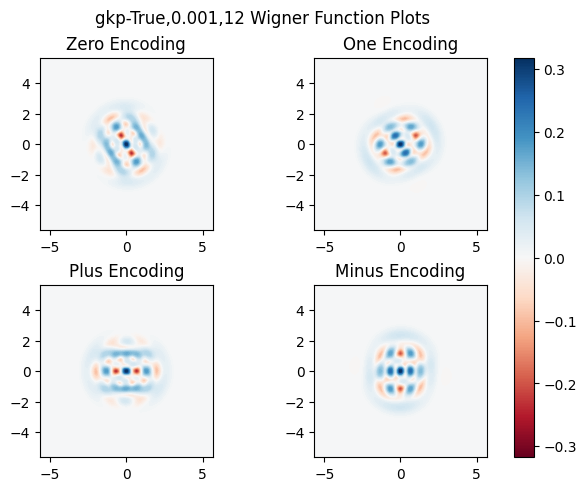

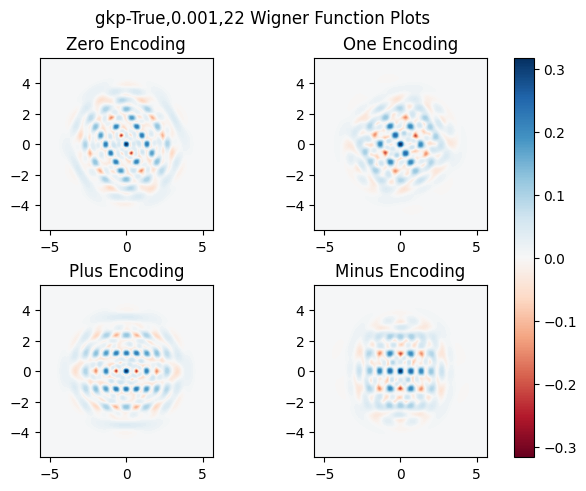

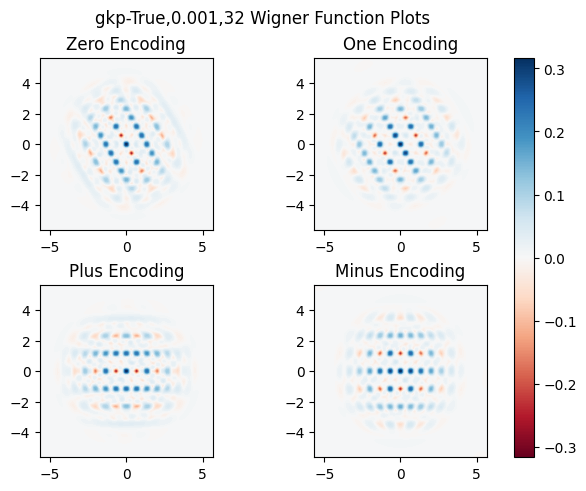

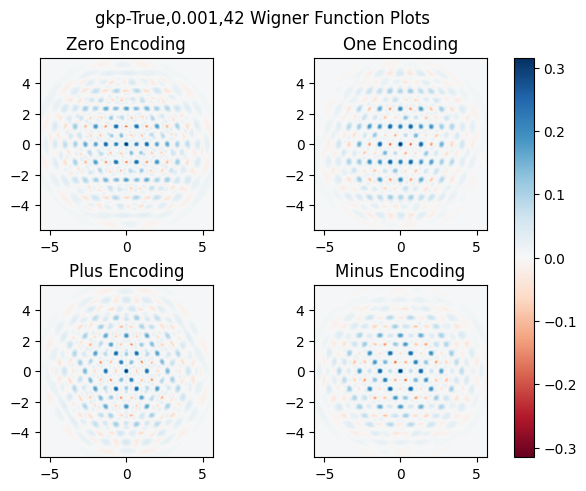

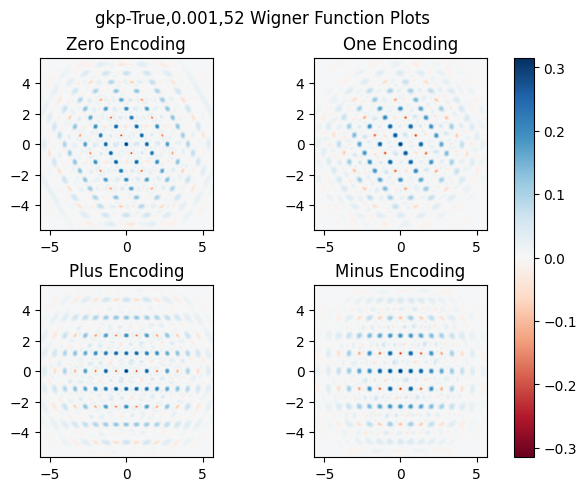

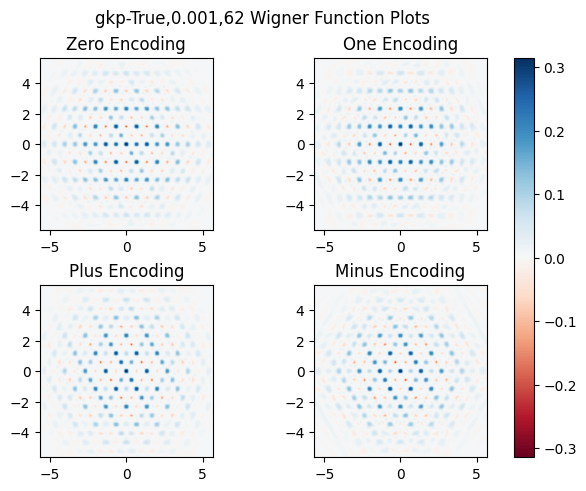

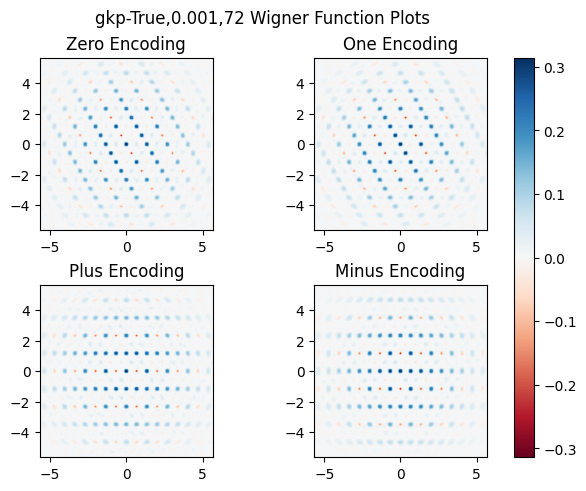

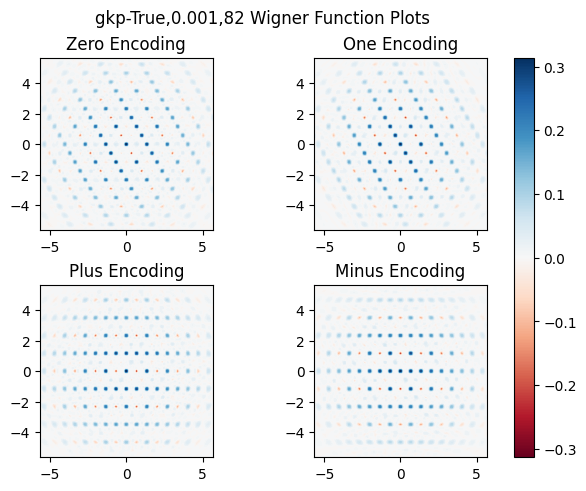

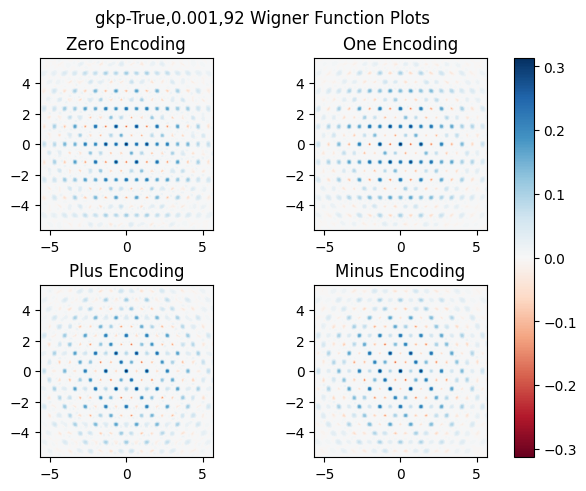

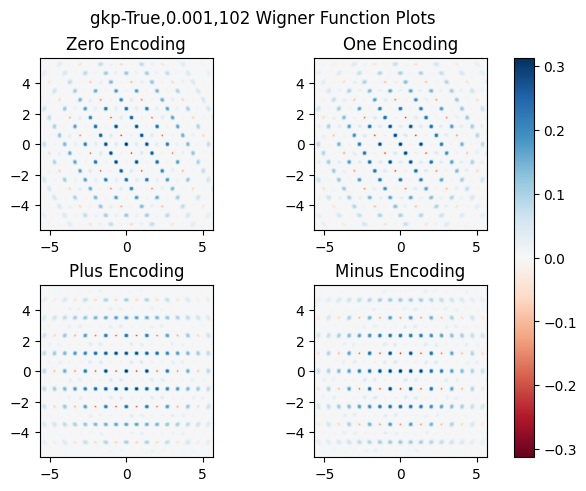

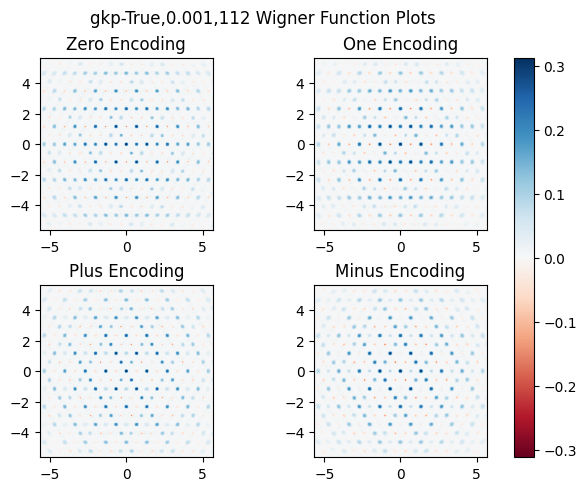

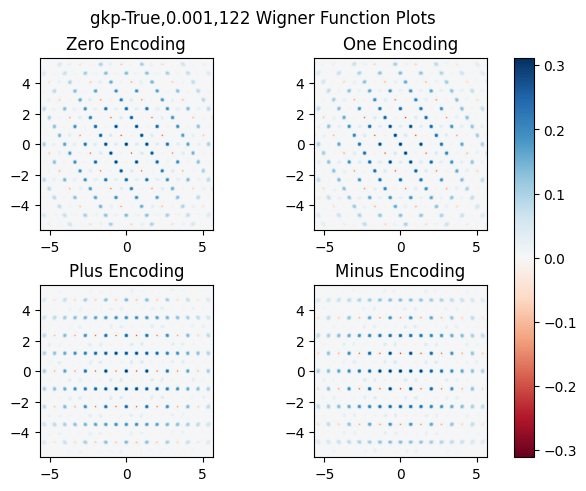

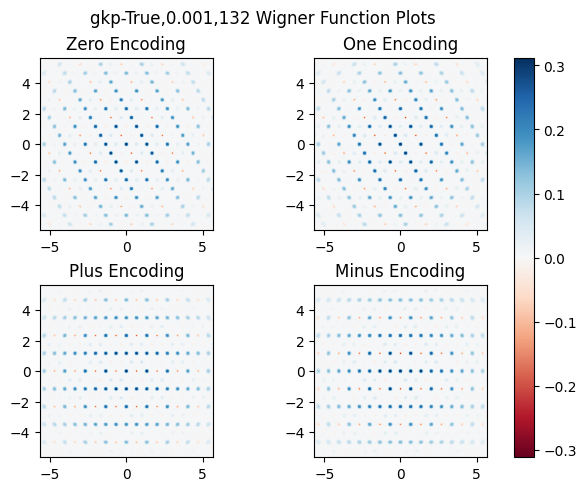

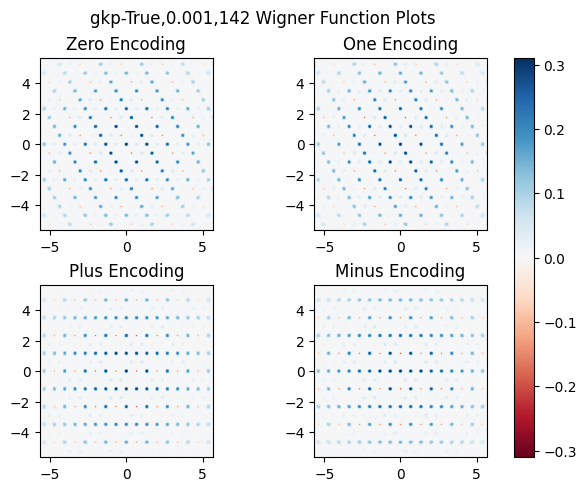

In [3]:
pool = multiprocess.Pool()

truth_gkp = code.get_gkp_code(True, energy_constraint, truth_physical_dimension)
test_gkp_codes = pool.map(lambda physical_dimension: code.get_gkp_code(True, energy_constraint, physical_dimension), range(lower_bound_physical_dimension, truth_physical_dimension + 1))
code_similarities = np.zeros((len(test_gkp_codes), 4))
for i, test_gkp_code in enumerate(test_gkp_codes):
	for j, similarity in enumerate(code_simulator.compute_code_similarities(truth_gkp, test_gkp_code)):
		code_similarities[i][j] = similarity
	if i % 10 == 0:
		code_simulator.make_wigner_plots_for(test_gkp_code)
		plt.show()
	#print(f"{i + lower_bound_physical_dimension}\t: {code_similarities[i]}")

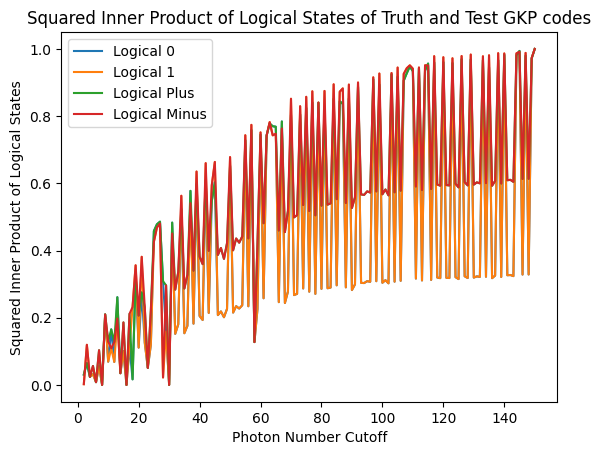

In [4]:
legend = ["Logical 0", "Logical 1", "Logical Plus", "Logical Minus"]
plt.figure()
for i in range(4):
	plt.plot(range(lower_bound_physical_dimension, truth_physical_dimension + 1), code_similarities[:,i], label=legend[i])
plt.legend()
plt.xlabel("Photon Number Cutoff")
plt.ylabel("Squared Inner Product of Logical States")
plt.title("Squared Inner Product of Logical States of Truth and Test GKP codes")
plt.show()

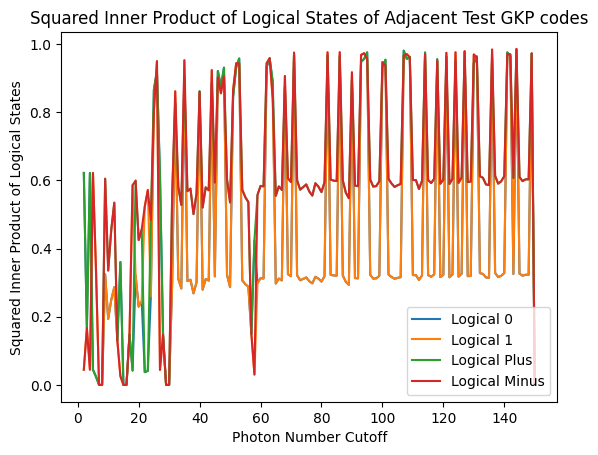

In [5]:
adjacent_code_similarities = np.zeros(code_similarities.shape)
for i, test_gkp_code in enumerate(test_gkp_codes[:-1]):
	for j, similarity in enumerate(code_simulator.compute_code_similarities(test_gkp_code, test_gkp_codes[i + 1])):
		adjacent_code_similarities[i][j] = similarity
	#print(f"{i + lower_bound_physical_dimension}\t: {code_similarities[i]}")

plt.figure()
for i in range(4):
	plt.plot(range(lower_bound_physical_dimension, truth_physical_dimension + 1), adjacent_code_similarities[:,i], label=legend[i])
plt.legend()
plt.xlabel("Photon Number Cutoff")
plt.ylabel("Squared Inner Product of Logical States")
plt.title("Squared Inner Product of Logical States of Adjacent Test GKP codes")
plt.show()

### Relationship Determination Between Energy Constraint and Average Photon Number

TODO